In [258]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Define the UCB algorithm implementation
def ucb_bandit(n_rounds=100, n_machines=3, true_probs=None):
    
    # Set true probabilities if not provided
    if true_probs is None:
        true_probs = [random.uniform(0.1, 0.9) for _ in range(n_machines)]
    
    # Initialize variables
    n_plays = [0] * n_machines  
    total_rewards = [0] * n_machines  
    average_rewards = [0] * n_machines  
    ucb_values = [float('inf')] * n_machines  
    
    # Track history
    chosen_machines = []
    rewards = []
    cumulative_rewards = []
    
    total_reward = 0
    
    print(f"True probabilities of slot machines: {[f'{p:.3f}' for p in true_probs]}")
    print("=" * 60)
    
    # Main game loop
    for round_num in range(1, n_rounds + 1):
        # Calculate UCB values for all machines
        for i in range(n_machines):
            if n_plays[i] > 0:
                # UCB formula: average_reward + sqrt(2 * ln(total_plays) / n_plays)
                exploration_bonus = np.sqrt(2 * np.log(round_num) / n_plays[i])
                ucb_values[i] = average_rewards[i] + exploration_bonus
            else:
                # If machine hasn't been played, keep it at infinity to ensure exploration
                ucb_values[i] = float('inf')
        
        # Choose machine with highest UCB value
        chosen_machine = np.argmax(ucb_values)
        
        # Play the chosen machine and get reward (1 with probability p, 0 otherwise)
        reward = 1 if random.random() < true_probs[chosen_machine] else 0
        
        # Update statistics
        n_plays[chosen_machine] += 1
        total_rewards[chosen_machine] += reward
        average_rewards[chosen_machine] = total_rewards[chosen_machine] / n_plays[chosen_machine]
        
        # Track history
        chosen_machines.append(chosen_machine)
        rewards.append(reward)
        total_reward += reward
        cumulative_rewards.append(total_reward)
        
        # Print progress every 20 rounds
        if round_num % 20 == 0 or round_num <= 3:
            print(f"Round {round_num:3d}: Machine {chosen_machine} | "
                  f"Reward: {reward} | "
                  f"UCB values: {[f'{ucb:.3f}' for ucb in ucb_values]}")
    
    # Return results
    return {
        'true_probs': true_probs,
        'n_plays': n_plays,
        'average_rewards': average_rewards,
        'total_reward': total_reward,
        'chosen_machines': chosen_machines,
        'rewards': rewards,
        'cumulative_rewards': cumulative_rewards,
        'optimal_machine': np.argmax(true_probs)
    }

In [ ]:
# Run the UCB algorithm
print("Multi-Armed Bandit Problem with UCB Algorithm")
print("=" * 50)
results = ucb_bandit(n_rounds=100)

Multi-Armed Bandit Problem with UCB Algorithm
True probabilities of slot machines: ['0.413', '0.803', '0.114']
Round   1: Machine 0 | Reward: 0 | UCB values: ['inf', 'inf', 'inf']
Round   2: Machine 1 | Reward: 1 | UCB values: ['1.177', 'inf', 'inf']
Round   3: Machine 2 | Reward: 0 | UCB values: ['1.482', '2.482', 'inf']
Round  20: Machine 1 | Reward: 1 | UCB values: ['1.474', '1.540', '1.413']
Round  40: Machine 0 | Reward: 1 | UCB values: ['1.460', '1.375', '1.358']
Round  60: Machine 0 | Reward: 1 | UCB values: ['1.243', '1.227', '1.168']
Round  80: Machine 0 | Reward: 1 | UCB values: ['1.240', '1.217', '1.209']
Round 100: Machine 1 | Reward: 1 | UCB values: ['1.129', '1.163', '1.147']


In [261]:
# Display final results
print("\n" + "=" * 60)
print("FINAL RESULTS")
print("=" * 60)

optimal_machine = results['optimal_machine']
print(f"Optimal Machine: Machine {optimal_machine} "
      f"(Probability: {results['true_probs'][optimal_machine]:.3f})")

for i in range(3):
    machine_type = "*** OPTIMAL ***" if i == optimal_machine else ""
    print(f"Machine {i}: "
          f"True Prob = {results['true_probs'][i]:.3f}, "
          f"Plays = {results['n_plays'][i]:3d}, "
          f"Avg Reward = {results['average_rewards'][i]:.3f} {machine_type}")

print(f"\nTotal Reward: {results['total_reward']}/100")
print(f"Success Rate: {results['total_reward']/100:.1%}")

# Calculate how often we played the optimal machine
optimal_plays = results['chosen_machines'].count(optimal_machine)
print(f"Optimal Machine Plays: {optimal_plays}/100 ({optimal_plays/100:.1%})")



FINAL RESULTS
Optimal Machine: Machine 1 (Probability: 0.803)
Machine 0: True Prob = 0.413, Plays =  20, Avg Reward = 0.450 
Machine 1: True Prob = 0.803, Plays =  73, Avg Reward = 0.808 *** OPTIMAL ***
Machine 2: True Prob = 0.114, Plays =   7, Avg Reward = 0.000 

Total Reward: 68/100
Success Rate: 68.0%
Optimal Machine Plays: 73/100 (73.0%)


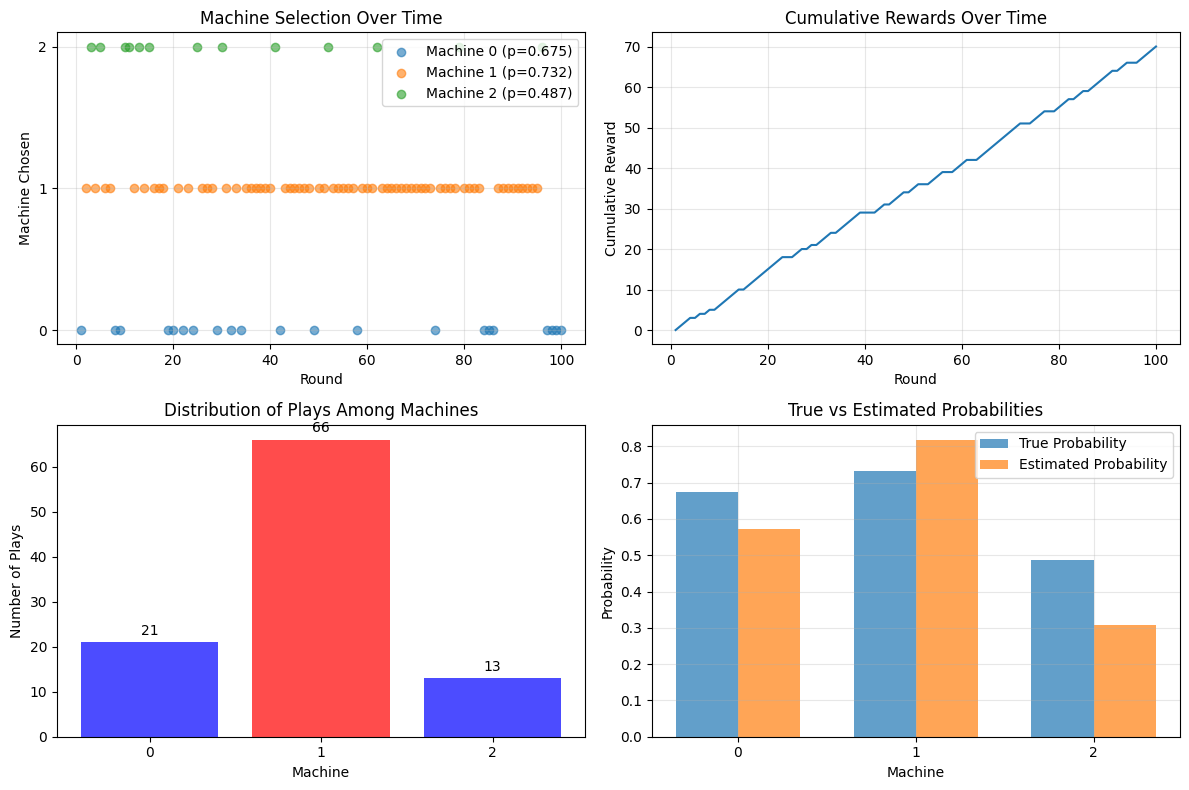

In [252]:
# Visualization - Machine Selection Over Time
plt.figure(figsize=(12, 8))

# Plot 1: Machine selection over time
plt.subplot(2, 2, 1)
for machine in range(3):
    machine_rounds = [i+1 for i, m in enumerate(results['chosen_machines']) if m == machine]
    plt.scatter(machine_rounds, [machine] * len(machine_rounds), 
               label=f'Machine {machine} (p={results["true_probs"][machine]:.3f})', alpha=0.6)
plt.xlabel('Round')
plt.ylabel('Machine Chosen')
plt.title('Machine Selection Over Time')
plt.yticks([0, 1, 2])
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cumulative rewards
plt.subplot(2, 2, 2)
plt.plot(range(1, 101), results['cumulative_rewards'])
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Time')
plt.grid(True, alpha=0.3)

# Plot 3: Machine play counts
plt.subplot(2, 2, 3)
colors = ['red' if i == optimal_machine else 'blue' for i in range(3)]
bars = plt.bar(range(3), results['n_plays'], color=colors, alpha=0.7)
plt.xlabel('Machine')
plt.ylabel('Number of Plays')
plt.title('Distribution of Plays Among Machines')
plt.xticks(range(3))
for i, v in enumerate(results['n_plays']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

# Plot 4: Learning progress (estimated vs true probabilities)
plt.subplot(2, 2, 4)
x_pos = np.arange(3)
width = 0.35
plt.bar(x_pos - width/2, results['true_probs'], width, label='True Probability', alpha=0.7)
plt.bar(x_pos + width/2, results['average_rewards'], width, label='Estimated Probability', alpha=0.7)
plt.xlabel('Machine')
plt.ylabel('Probability')
plt.title('True vs Estimated Probabilities')
plt.xticks(range(3))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [253]:
# Additional analysis
print("\n" + "=" * 60)
print("PERFORMANCE ANALYSIS")
print("=" * 60)

# Calculate regret (difference from optimal performance)
optimal_reward_rate = max(results['true_probs'])
actual_reward_rate = results['total_reward'] / 100
regret = (optimal_reward_rate - actual_reward_rate) * 100

print(f"Optimal expected reward rate: {optimal_reward_rate:.3f}")
print(f"Actual reward rate: {actual_reward_rate:.3f}")
print(f"Total regret: {regret:.2f} rewards (out of 100)")

# Show exploration vs exploitation pattern
first_half = results['chosen_machines'][:50]
second_half = results['chosen_machines'][50:]

first_optimal = first_half.count(optimal_machine) / 50
second_optimal = second_half.count(optimal_machine) / 50

print(f"\nExploration vs Exploitation Pattern:")
print(f"First 50 rounds - Optimal machine plays: {first_optimal:.1%}")
print(f"Last 50 rounds - Optimal machine plays: {second_optimal:.1%}")

if second_optimal > first_optimal:
    print("✓ The algorithm successfully learned to exploit the best machine!")
else:
    print("○ The algorithm is still exploring different machines.")

# Cell 7: Run multiple simulations to show average performance
print("\n" + "=" * 60)
print("MULTIPLE SIMULATION AVERAGE (10 runs)")
print("=" * 60)

def run_multiple_simulations(n_simulations=10, n_rounds=100):
    total_rewards = []
    optimal_plays = []
    
    for sim in range(n_simulations):
        results = ucb_bandit(n_rounds=n_rounds)
        total_rewards.append(results['total_reward'])
        optimal_plays.append(results['chosen_machines'].count(results['optimal_machine']))
    
    avg_reward = np.mean(total_rewards)
    avg_optimal_play = np.mean(optimal_plays)
    
    print(f"Average Total Reward: {avg_reward:.1f}/100")
    print(f"Average Optimal Machine Plays: {avg_optimal_play:.1f}/100 ({avg_optimal_play/100:.1%})")
    print(f"Average Success Rate: {avg_reward/100:.1%}")

# Run multiple simulations (commented out to avoid long output)
# Uncomment the line below to see average performance over multiple runs
run_multiple_simulations(n_simulations=10)


PERFORMANCE ANALYSIS
Optimal expected reward rate: 0.732
Actual reward rate: 0.700
Total regret: 3.18 rewards (out of 100)

Exploration vs Exploitation Pattern:
First 50 rounds - Optimal machine plays: 58.0%
Last 50 rounds - Optimal machine plays: 74.0%
✓ The algorithm successfully learned to exploit the best machine!

MULTIPLE SIMULATION AVERAGE (10 runs)
True probabilities of slot machines: ['0.471', '0.814', '0.372']
Round   1: Machine 0 | Reward: 0 | UCB values: ['inf', 'inf', 'inf']
Round   2: Machine 1 | Reward: 1 | UCB values: ['1.177', 'inf', 'inf']
Round   3: Machine 2 | Reward: 1 | UCB values: ['1.482', '2.482', 'inf']
Round  20: Machine 0 | Reward: 0 | UCB values: ['1.474', '1.374', '1.474']
Round  40: Machine 2 | Reward: 0 | UCB values: ['1.169', '1.263', '1.312']
Round  60: Machine 1 | Reward: 1 | UCB values: ['1.178', '1.200', '1.176']
Round  80: Machine 1 | Reward: 0 | UCB values: ['1.148', '1.181', '1.136']
Round 100: Machine 2 | Reward: 1 | UCB values: ['1.134', '1.15

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

# Define the interactive bandit class
class InteractiveBandit:
    def __init__(self, n_machines=3):
        self.n_machines = n_machines
        self.true_probs = [random.uniform(0.2, 0.8) for _ in range(n_machines)]
        self.reset()
        
    def reset(self):
        self.n_plays = [0] * self.n_machines
        self.total_rewards = [0] * self.n_machines
        self.average_rewards = [0] * self.n_machines
        self.ucb_values = [float('inf')] * self.n_machines
        self.round_num = 0
        self.total_reward = 0
        self.chosen_machines = []
        self.rewards = []
        self.cumulative_rewards = []
        
    def pull_machine(self, machine_idx):
        """Pull a specific machine and return reward"""
        self.round_num += 1
        reward = 1 if random.random() < self.true_probs[machine_idx] else 0
        
        # Update statistics
        self.n_plays[machine_idx] += 1
        self.total_rewards[machine_idx] += reward
        self.average_rewards[machine_idx] = self.total_rewards[machine_idx] / self.n_plays[machine_idx]
        
        # Update UCB values for next round
        for i in range(self.n_machines):
            if self.n_plays[i] > 0:
                exploration_bonus = np.sqrt(2 * np.log(self.round_num) / self.n_plays[i])
                self.ucb_values[i] = self.average_rewards[i] + exploration_bonus
            else:
                self.ucb_values[i] = float('inf')
        
        # Track history
        self.chosen_machines.append(machine_idx)
        self.rewards.append(reward)
        self.total_reward += reward
        self.cumulative_rewards.append(self.total_reward)
        
        return reward
    
    def get_optimal_machine(self):
        return np.argmax(self.true_probs)
    
    def get_recommended_machine(self):
        """Get machine recommended by UCB algorithm"""
        return np.argmax(self.ucb_values)

# Create the interactive interface
def create_interactive_bandit():
    bandit = InteractiveBandit()
    
    # Create widgets
    machine_buttons = []
    for i in range(3):
        btn = widgets.Button(
            description=f'Pull Machine {i}',
            button_style='',
            tooltip=f'Pull the lever of Machine {i}'
        )
        machine_buttons.append(btn)
    
    auto_play_btn = widgets.Button(
        description='Auto Play (UCB Algorithm)',
        button_style='success',
        tooltip='Let the UCB algorithm play automatically'
    )
    
    reset_btn = widgets.Button(
        description='Reset Game',
        button_style='warning',
        tooltip='Reset the game to start over'
    )
    
    rounds_slider = widgets.IntSlider(
        value=10,
        min=1,
        max=50,
        step=1,
        description='Auto-play rounds:',
        continuous_update=False
    )
    
    output = widgets.Output()
    
    # Display initial state
    with output:
        clear_output()
        print("🎰 WELCOME TO THE INTERACTIVE SLOT MACHINE GAME! 🎰")
        print("=" * 55)
        print("True probabilities (hidden from player):")
        for i, prob in enumerate(bandit.true_probs):
            print(f"  Machine {i}: {prob:.3f}")
        print(f"🎯 Optimal Machine: Machine {bandit.get_optimal_machine()}")
        print("\nClick the buttons to pull machines or use auto-play!")
        print("=" * 55)
    
    def update_display():
        with output:
            clear_output()
            print(f"Round: {bandit.round_num}/100")
            print("=" * 55)
            
            # Display machine statistics
            print("MACHINE STATISTICS:")
            for i in range(3):
                star = " ★" if i == bandit.get_optimal_machine() else ""
                ucb_display = f"{bandit.ucb_values[i]:.3f}" if bandit.n_plays[i] > 0 else "∞"
                print(f"  Machine {i}: Plays={bandit.n_plays[i]:2d}, "
                      f"Avg Reward={bandit.average_rewards[i]:.3f}, "
                      f"UCB={ucb_display}{star}")
            
            print(f"\nTotal Rewards: {bandit.total_reward}")
            print(f"Success Rate: {bandit.total_reward/max(1, bandit.round_num):.1%}")
            
            # Show recommendation
            if bandit.round_num > 0:
                recommended = bandit.get_recommended_machine()
                print(f"🤖 UCB Recommendation: Machine {recommended}")
            
            # Show last few results
            if bandit.round_num > 0:
                print(f"\nLast 5 pulls:")
                start_idx = max(0, len(bandit.chosen_machines) - 5)
                for i in range(start_idx, len(bandit.chosen_machines)):
                    machine = bandit.chosen_machines[i]
                    reward = "🎉 WIN!" if bandit.rewards[i] else "❌ LOSS"
                    print(f"  Round {i+1}: Machine {machine} → {reward}")
    
    def on_machine_button_clicked(b, machine_idx):
        if bandit.round_num >= 100:
            with output:
                print("Game over! Please reset to play again.")
            return
            
        reward = bandit.pull_machine(machine_idx)
        with output:
            clear_output()
            if reward:
                print(f"🎉 CONGRATULATIONS! You won on Machine {machine_idx}!")
            else:
                print(f"❌ Sorry, no win on Machine {machine_idx}. Try again!")
            print("-" * 40)
        update_display()
        
        # Check if game over
        if bandit.round_num >= 100:
            with output:
                print("\n" + "=" * 55)
                print("🎊 GAME OVER! 🎊")
                print("=" * 55)
                show_final_results(bandit)
    
    def on_auto_play_clicked(b):
        if bandit.round_num >= 100:
            with output:
                print("Game over! Please reset to play again.")
            return
            
        n_rounds = rounds_slider.value
        with output:
            clear_output()
            print(f"🤖 UCB Algorithm playing {n_rounds} rounds automatically...")
            print("The algorithm will balance exploration and exploitation")
            print("-" * 55)
        
        for i in range(n_rounds):
            if bandit.round_num >= 100:
                break
            machine = bandit.get_recommended_machine()
            reward = bandit.pull_machine(machine)
            
        update_display()
        
        # Check if game over
        if bandit.round_num >= 100:
            with output:
                print("\n" + "=" * 55)
                print("🎊 GAME OVER! 🎊")
                print("=" * 55)
                show_final_results(bandit)
    
    def on_reset_clicked(b):
        bandit.reset()
        with output:
            clear_output()
            print("🔄 Game Reset! Ready to play again!")
            print("True probabilities (hidden from player):")
            for i, prob in enumerate(bandit.true_probs):
                print(f"  Machine {i}: {prob:.3f}")
            print(f"🎯 Optimal Machine: Machine {bandit.get_optimal_machine()}")
            print("\nClick the buttons to pull machines or use auto-play!")
            print("=" * 55)
    
    def show_final_results(bandit):
        optimal = bandit.get_optimal_machine()
        optimal_plays = bandit.chosen_machines.count(optimal)
        
        print("FINAL RESULTS:")
        print(f"Total Rounds: {bandit.round_num}")
        print(f"Total Rewards: {bandit.total_reward}")
        print(f"Overall Success Rate: {bandit.total_reward/bandit.round_num:.1%}")
        print(f"Optimal Machine Plays: {optimal_plays}/{bandit.round_num} ({optimal_plays/bandit.round_num:.1%})")
        
        print("\nMACHINE BREAKDOWN:")
        for i in range(3):
            marker = " 🏆 BEST" if i == optimal else ""
            print(f"  Machine {i}: {bandit.n_plays[i]} plays, "
                  f"{bandit.total_rewards[i]} wins, "
                  f"rate: {bandit.average_rewards[i]:.3f}{marker}")
        
        # Learning analysis
        if bandit.round_num > 10:
            first_half = bandit.chosen_machines[:bandit.round_num//2]
            second_half = bandit.chosen_machines[bandit.round_num//2:]
            first_optimal = first_half.count(optimal) / len(first_half)
            second_optimal = second_half.count(optimal) / len(second_half)
            
            print(f"\n📊 LEARNING ANALYSIS:")
            print(f"First half - Optimal machine usage: {first_optimal:.1%}")
            print(f"Second half - Optimal machine usage: {second_optimal:.1%}")
            
            if second_optimal > first_optimal:
                print("✅ The algorithm successfully learned to exploit the best machine!")
            else:
                print("❌ The algorithm didn't clearly learn the best machine.")
    
    # Connect buttons to functions
    for i, button in enumerate(machine_buttons):
        button.on_click(lambda b, idx=i: on_machine_button_clicked(b, idx))
    
    auto_play_btn.on_click(on_auto_play_clicked)
    reset_btn.on_click(on_reset_clicked)
    
    # Layout
    buttons_box = widgets.HBox(machine_buttons)
    control_box = widgets.HBox([auto_play_btn, reset_btn])
    slider_box = widgets.HBox([rounds_slider])
    
    # Display everything
    display(widgets.VBox([buttons_box, control_box, slider_box, output]))
    
    return bandit

# Initialize the interactive game
print("Setting up Interactive Multi-Armed Bandit Game...")
bandit_game = create_interactive_bandit()

# Additional visualization
def create_visualization_tool():
    """Create a separate tool to visualize the algorithm's performance"""
    viz_output = widgets.Output()
    
    def on_visualize_clicked(b):
        with viz_output:
            clear_output()
            if bandit_game.round_num == 0:
                print("Play some rounds first to see visualizations!")
                return
                
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
            
            # Plot 1: Machine selection over time
            for machine in range(3):
                machine_rounds = [i+1 for i, m in enumerate(bandit_game.chosen_machines) if m == machine]
                ax1.scatter(machine_rounds, [machine] * len(machine_rounds), 
                           label=f'Machine {machine}', alpha=0.6, s=50)
            ax1.set_xlabel('Round')
            ax1.set_ylabel('Machine Chosen')
            ax1.set_title('Machine Selection Over Time')
            ax1.set_yticks([0, 1, 2])
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # Plot 2: Cumulative rewards
            ax2.plot(range(1, bandit_game.round_num + 1), bandit_game.cumulative_rewards)
            ax2.set_xlabel('Round')
            ax2.set_ylabel('Cumulative Reward')
            ax2.set_title('Cumulative Rewards Over Time')
            ax2.grid(True, alpha=0.3)
            
            # Plot 3: Machine play distribution
            colors = ['red' if i == bandit_game.get_optimal_machine() else 'blue' for i in range(3)]
            bars = ax3.bar(range(3), bandit_game.n_plays, color=colors, alpha=0.7)
            ax3.set_xlabel('Machine')
            ax3.set_ylabel('Number of Plays')
            ax3.set_title('Distribution of Plays Among Machines')
            ax3.set_xticks(range(3))
            for i, v in enumerate(bandit_game.n_plays):
                ax3.text(i, v + 0.5, str(v), ha='center', va='bottom')
            
            # Plot 4: Success rates
            x_pos = np.arange(3)
            width = 0.35
            ax4.bar(x_pos - width/2, bandit_game.true_probs, width, 
                   label='True Probability', alpha=0.7)
            ax4.bar(x_pos + width/2, bandit_game.average_rewards, width, 
                   label='Estimated Probability', alpha=0.7)
            ax4.set_xlabel('Machine')
            ax4.set_ylabel('Probability')
            ax4.set_title('True vs Estimated Probabilities')
            ax4.set_xticks(range(3))
            ax4.legend()
            ax4.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
    
    viz_btn = widgets.Button(description="Show Visualizations", button_style='info')
    viz_btn.on_click(on_visualize_clicked)
    
    display(viz_btn)
    display(viz_output)

# Add visualization tool
print("\n" + "="*50)
print("VISUALIZATION TOOL")
print("="*50)
create_visualization_tool()


Setting up Interactive Multi-Armed Bandit Game...



VISUALIZATION TOOL


Button(button_style='info', description='Show Visualizations', style=ButtonStyle())

Output()